4 Coordinate Model Using Full Paths

In [121]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [122]:
# get the main paths
df = pd.read_csv('../simulations/data/paths.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   name           104 non-null    object 
 2   latitude_1     104 non-null    float64
 3   longitude_1    104 non-null    float64
 4   latitude_2     104 non-null    float64
 5   longitude_2    104 non-null    float64
 6   latitude_3     104 non-null    float64
 7   longitude_3    104 non-null    float64
 8   latitude_4     104 non-null    float64
 9   longitude_4    104 non-null    float64
 10  latitude_5     104 non-null    float64
 11  longitude_5    104 non-null    float64
 12  latitude_6     104 non-null    float64
 13  longitude_6    104 non-null    float64
 14  latitude_7     104 non-null    float64
 15  longitude_7    104 non-null    float64
 16  latitude_8     104 non-null    float64
 17  longitude_8    104 non-null    float64
 18  latitude_9

In [124]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,latitude_2,longitude_2,latitude_3,longitude_3,latitude_4,longitude_4,...,longitude_16,latitude_17,longitude_17,latitude_18,longitude_18,latitude_19,longitude_19,latitude_20,longitude_20,enter-parking
0,0,1_A_Box_Missed,36.111427,-115.141162,36.111381,-115.141091,36.111347,-115.141023,36.111308,-115.140967,...,-115.140629,36.110556,-115.140430,36.110567,-115.140288,36.110562,-115.140142,36.110603,-115.139945,0
1,1,1_B_Box_Missed,36.109570,-115.139090,36.109629,-115.139097,36.109682,-115.139100,36.109740,-115.139112,...,-115.139466,36.110436,-115.139576,36.110543,-115.139585,36.110584,-115.139662,36.110601,-115.139848,0
2,2,2_A_Box_Missed,36.109683,-115.140953,36.109689,-115.140888,36.109761,-115.140867,36.109833,-115.140864,...,-115.140517,36.110554,-115.140408,36.110570,-115.140231,36.110578,-115.140061,36.110599,-115.139937,0
3,3,2_B_Box_Missed,36.111253,-115.139070,36.111180,-115.139069,36.111115,-115.139067,36.111023,-115.139059,...,-115.139501,36.110641,-115.139535,36.110612,-115.139602,36.110591,-115.139709,36.110601,-115.139859,0
4,4,3_A_Box_Missed,36.109685,-115.141624,36.109745,-115.141608,36.109776,-115.141538,36.109845,-115.141524,...,-115.140643,36.110548,-115.140502,36.110564,-115.140311,36.110570,-115.140084,36.110597,-115.139945,0


In [125]:
# Split up
def split_data(amount, data):
    """
    Splits the columns of the data and returns a new data frame
    Args:
        amount:

    Returns:

    """
    # Create dataframe columns first
    columns = []
    for index in range(1, amount + 1):
        latitude = 'latitude_' + str(index)
        longitude = 'longitude_' + str(index)
        columns.append(latitude)
        columns.append(longitude)

    columns.append('enter-parking')

    coord1 = data[data.columns[2:10]].values
    coord1 = np.column_stack((coord1, data['enter-parking'].values))

    coord2 = data[data.columns[10:18]].values
    coord2 = np.column_stack((coord2, data['enter-parking'].values))

    coord3 = data[data.columns[18:26]].values
    coord3 = np.column_stack((coord3, data['enter-parking'].values))

    coord4 = data[data.columns[26:34]].values
    coord4 = np.column_stack((coord4, data['enter-parking'].values))

    coord5 = data[data.columns[34:42]].values
    coord5 = np.column_stack((coord5, data['enter-parking'].values))

    all_coords = np.concatenate((coord1, coord2, coord3, coord4, coord5), axis=0)

    new_data = pd.DataFrame(all_coords, columns=columns)

    new_data = new_data.astype({'enter-parking': np.int})

    return new_data

new_df = split_data(4, df)

pass

In [126]:
# Get The cordinates for x
x = new_df[new_df.columns[:8]]

# Get the last coordinate
y = new_df['enter-parking'].values

In [127]:
print(x)
print(y)

     latitude_1  longitude_1  latitude_2  longitude_2  latitude_3  \
0     36.111427  -115.141162   36.111381  -115.141091   36.111347   
1     36.109570  -115.139090   36.109629  -115.139097   36.109682   
2     36.109683  -115.140953   36.109689  -115.140888   36.109761   
3     36.111253  -115.139070   36.111180  -115.139069   36.111115   
4     36.109685  -115.141624   36.109745  -115.141608   36.109776   
..          ...          ...         ...          ...         ...   
515   36.110576  -115.140061   36.110574  -115.140131   36.110587   
516   36.111006  -115.140741   36.110878  -115.140732   36.110878   
517   36.111812  -115.139628   36.111784  -115.139642   36.111769   
518   36.111811  -115.139468   36.111814  -115.139531   36.111802   
519   36.111771  -115.139575   36.111792  -115.139598   36.111792   

     longitude_3  latitude_4  longitude_4  
0    -115.141023   36.111308  -115.140967  
1    -115.139100   36.109740  -115.139112  
2    -115.140867   36.109833  -115.1408

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=63)

In [129]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [130]:
x_train.shape

(390, 8)

In [131]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Model creation
model = Sequential()

# 8 neurons for input layer
model.add(Dense(8, activation='relu'))

model.add(Dense(6, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [132]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=250,
                    validation_data=(x_test, y_test),
                    callbacks=early_stop,
                    shuffle=True)

Epoch 1/250
13/13 [==============================] - 1s 17ms/step - loss: 0.6882 - accuracy: 0.5000 - val_loss: 0.6720 - val_accuracy: 0.5846
Epoch 2/250
13/13 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5615 - val_loss: 0.6688 - val_accuracy: 0.5846
Epoch 3/250
13/13 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5615 - val_loss: 0.6703 - val_accuracy: 0.5846
Epoch 4/250
13/13 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.5615 - val_loss: 0.6648 - val_accuracy: 0.5846
Epoch 5/250
13/13 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5615 - val_loss: 0.6660 - val_accuracy: 0.5846
Epoch 6/250
13/13 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5718 - val_loss: 0.67

In [133]:
losses = pd.DataFrame(model.history.history)

In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

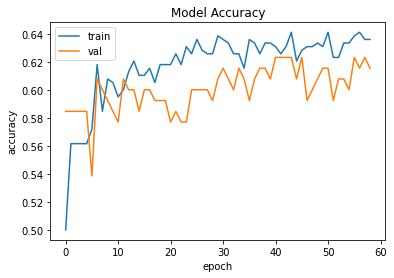

In [135]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

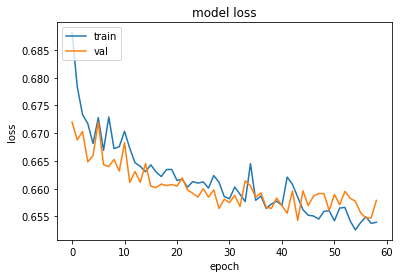

In [136]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [137]:
test_df = pd.read_csv('../simulations/data/test_paths.csv')

In [138]:
new_test_df = split_data(4, test_df)

In [139]:
test_x = new_test_df[new_test_df.columns[:8]]

test_y = new_test_df['enter-parking'].values

In [140]:
test_x = scaler.transform(test_x)

In [141]:
print(test_x)

print(test_y)

[[ 0.04716029  0.27982232  0.04495955  0.2696266   0.06253496  0.27115027
   0.10946606  0.26108723]
 [ 0.07032255  0.45830735  0.07502504  0.44340168  0.09901646  0.42775204
   0.13523126  0.41605639]
 [ 0.06618357  0.30868953  0.06957432  0.29352063  0.09290333  0.27746338
   0.13311249  0.26472266]
 [ 0.09274035  0.11021142  0.09765134  0.10610434  0.12286627  0.09228599
   0.16302348  0.08345448]
 [ 0.08372213  0.77789553  0.07874341  0.76868905  0.10112551  0.75763749
   0.13749377  0.7501938 ]
 [ 0.09064393  0.78854514  0.09530416  0.77859079  0.12237703  0.76957295
   0.16135469  0.76695737]
 [ 0.07338572  0.42091724  0.05854336  0.3831001   0.08002516  0.35336058
   0.11646365  0.32653674]
 [ 0.36153614  0.69925281  0.3706195   0.68988745  0.39152137  0.68416116
   0.42801661  0.68147808]
 [ 0.77497896 -0.08036575  0.77568034 -0.0746618   0.78545886 -0.07084196
   0.79695308 -0.06209578]
 [ 0.07348944  0.50801797  0.08134554  0.46595911  0.11471895  0.43459107
   0.15628993  0.

In [142]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]


In [143]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        30
           1       0.64      0.62      0.63        45

    accuracy                           0.56        75
   macro avg       0.54      0.54      0.54        75
weighted avg       0.56      0.56      0.56        75



In [144]:
print(confusion_matrix(test_y, predictions))

[[14 16]
 [17 28]]
